In [1]:
pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [11]:
\
# Fetch dataset
covertype = fetch_ucirepo(id=31)

# Get the features DataFrame
X = covertype.data.features

# Print all column names
print("All columns in the dataset:")
for column in X.columns:
    print(column)

# Print the total number of columns
print(f"\nTotal number of columns: {len(X.columns)}")

All columns in the dataset:
Elevation
Aspect
Slope
Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Hillshade_9am
Hillshade_Noon
Hillshade_3pm
Horizontal_Distance_To_Fire_Points
Wilderness_Area1
Soil_Type1
Soil_Type2
Soil_Type3
Soil_Type4
Soil_Type5
Soil_Type6
Soil_Type7
Soil_Type8
Soil_Type9
Soil_Type10
Soil_Type11
Soil_Type12
Soil_Type13
Soil_Type14
Soil_Type15
Soil_Type16
Soil_Type17
Soil_Type18
Soil_Type19
Soil_Type20
Soil_Type21
Soil_Type22
Soil_Type23
Soil_Type24
Soil_Type25
Soil_Type26
Soil_Type27
Soil_Type28
Soil_Type29
Soil_Type30
Soil_Type31
Soil_Type32
Soil_Type33
Soil_Type34
Soil_Type35
Soil_Type36
Soil_Type37
Soil_Type38
Soil_Type39
Soil_Type40
Wilderness_Area2
Wilderness_Area3
Wilderness_Area4

Total number of columns: 54


In [2]:


# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

# Convert X and y into a single DataFrame
# Assuming that X and y are already in compatible formats
df = pd.DataFrame(X)
df['Target'] = y

# Display the first few rows of the DataFrame
print(df.head())


   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

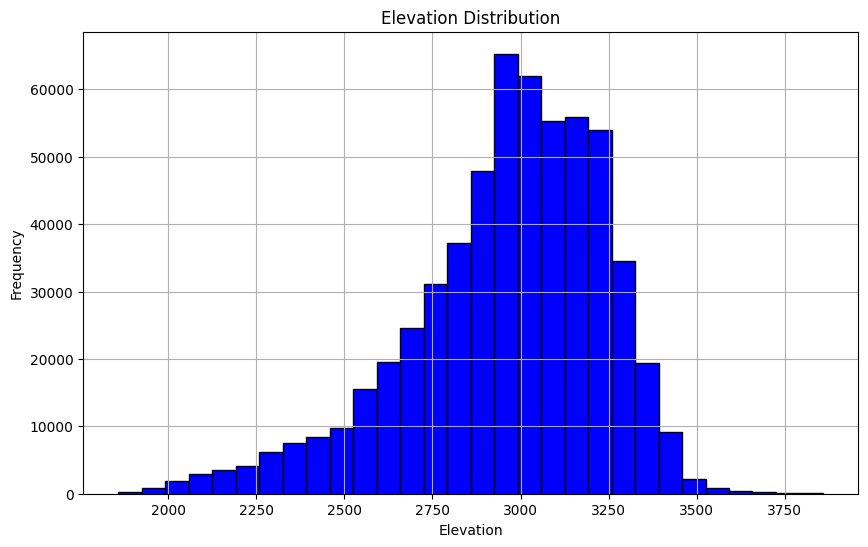

In [3]:
import matplotlib.pyplot as plt

# Plot a histogram of the Elevation column
plt.figure(figsize=(10, 6))
plt.hist(df['Elevation'], bins=30, color='blue', edgecolor='black')
plt.title('Elevation Distribution')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

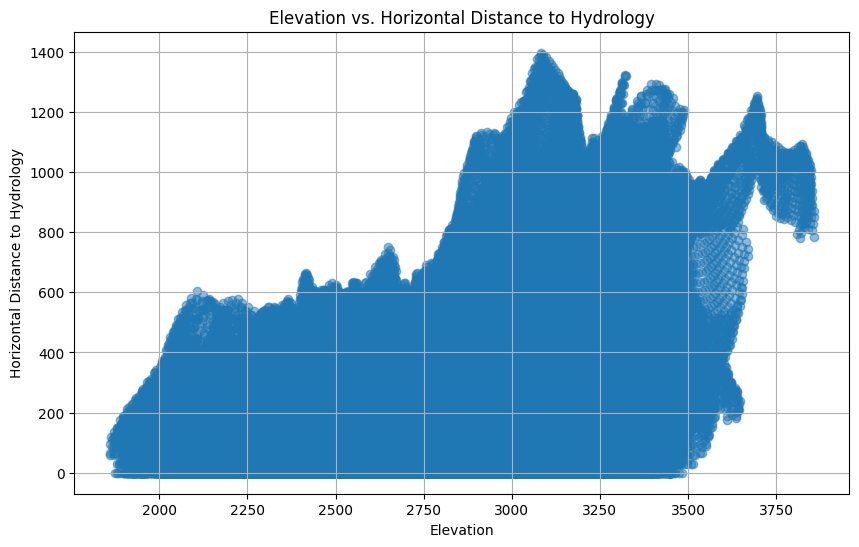

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Elevation'], df['Horizontal_Distance_To_Hydrology'], alpha=0.5)
plt.title('Elevation vs. Horizontal Distance to Hydrology')
plt.xlabel('Elevation')
plt.ylabel('Horizontal Distance to Hydrology')
plt.grid(True)
plt.show()

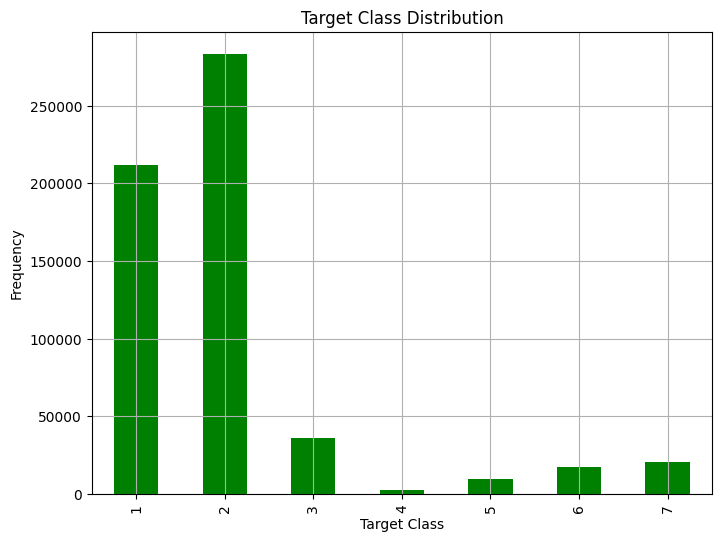

In [5]:
plt.figure(figsize=(8, 6))
df['Target'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Target Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [6]:

# Filter columns that are related to Soil Type
soil_columns = [col for col in df.columns if 'Soil_Type' in col]

# Display the Soil Type columns
print("Soil Types Columns:")
print(soil_columns)

# Now, let's print the first few rows of the Soil Type data
soil_data = df[soil_columns]
print("\nFirst 5 rows of Soil Type Data:")
print(soil_data)

Soil Types Columns:
['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

First 5 rows of Soil Type Data:
        Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  \
0                0           0           0           0           0   
1                0           0           0           0           0   
2                0           0           0           0           0   
3                0           0           0           0           0   
4    

In [10]:


# Filter columns that are related to Soil Type
soil_columns = [col for col in X.columns if 'Soil_Type' in col]

# Count the number of 1s for each soil type
soil_counts = X[soil_columns].sum().sort_values(ascending=False)

# Create a DataFrame with the counts
soil_counts_df = pd.DataFrame({'Soil Type': soil_counts.index, 'Count': soil_counts.values})

# Display the counts
print(soil_counts_df)

# Check for any soil types with zero occurrences
zero_soil_types = soil_counts[soil_counts == 0]
if not zero_soil_types.empty:
    print("\nSoil types with zero occurrences:")
    print(zero_soil_types)
else:
    print("\nAll soil types have at least one occurrence.")

      Soil Type   Count
0   Soil_Type29  115247
1   Soil_Type23   57752
2   Soil_Type32   52519
3   Soil_Type33   45154
4   Soil_Type22   33373
5   Soil_Type10   32634
6   Soil_Type30   30170
7   Soil_Type12   29971
8   Soil_Type31   25666
9   Soil_Type24   21278
10  Soil_Type13   17431
11  Soil_Type38   15573
12  Soil_Type39   13806
13  Soil_Type11   12410
14   Soil_Type4   12396
15  Soil_Type20    9259
16  Soil_Type40    8750
17   Soil_Type2    7525
18   Soil_Type6    6575
19   Soil_Type3    4823
20  Soil_Type19    4021
21  Soil_Type17    3422
22   Soil_Type1    3031
23  Soil_Type16    2845
24  Soil_Type26    2589
25  Soil_Type18    1899
26  Soil_Type35    1891
27  Soil_Type34    1611
28   Soil_Type5    1597
29   Soil_Type9    1147
30  Soil_Type27    1086
31  Soil_Type28     946
32  Soil_Type21     838
33  Soil_Type14     599
34  Soil_Type25     474
35  Soil_Type37     298
36   Soil_Type8     179
37  Soil_Type36     119
38   Soil_Type7     105
39  Soil_Type15       3

All soil types 

Number of soil type columns before removal: 40

Number of soil type columns after removal: 40

Soil type columns that remain in the DataFrame:
['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

Verifying that removed columns have sum of 0 in original data:


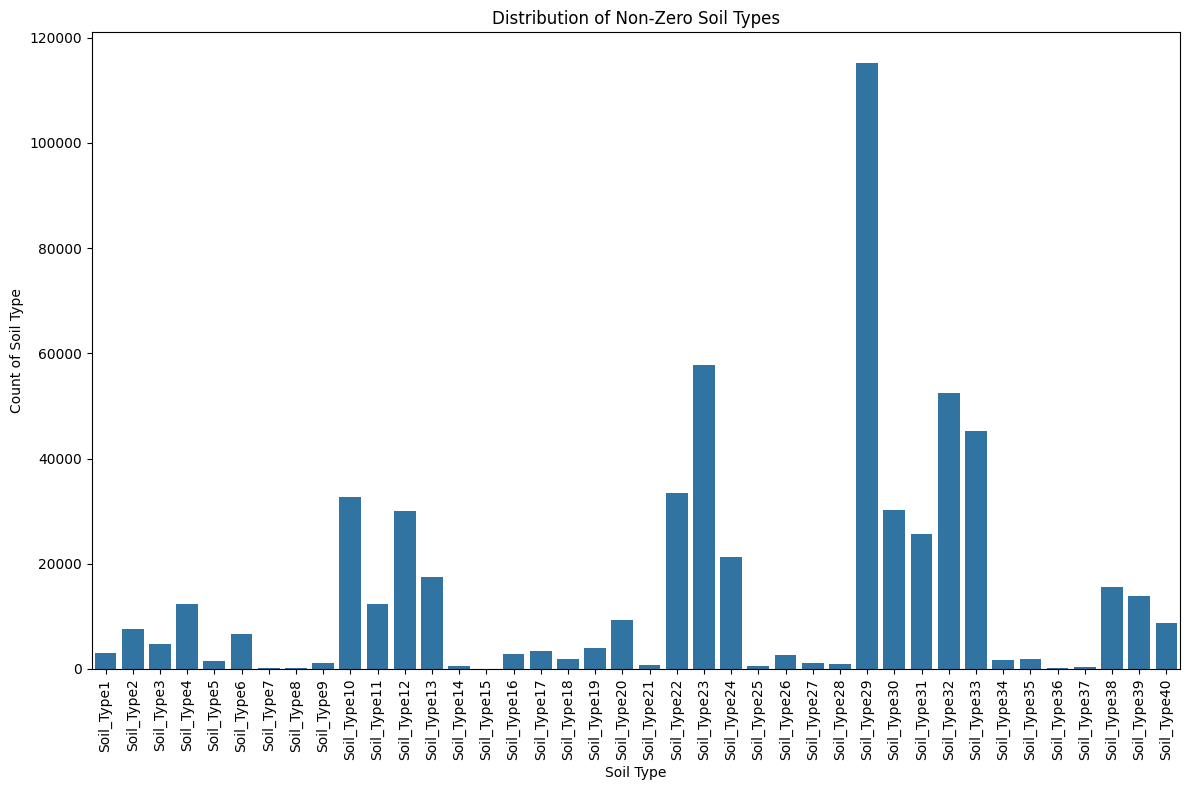


Number of soil types removed: 0


In [ ]:

# Filter columns that are related to Soil Type
soil_columns = [col for col in df.columns if 'Soil_Type' in col]

# Summing up the occurrences of each soil type across all rows
soil_counts = df[soil_columns].sum()

# Plotting the bar graph for all soil types
plt.figure(figsize=(12,8))
sns.barplot(x=soil_counts.index, y=soil_counts.values)
plt.title("Distribution of All Soil Types")
plt.xlabel("Soil Type")
plt.ylabel("Count of Soil Type")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


Soil types where there are no observations in the data (7, 8, 14, 15, 21, 25, 26, 27, 28, 34, 35, 36, 37, etc.) we will data clean to exclude. We will use L1 and L2 regression, and determine which gives the line of best fit, in order to analyze our data.





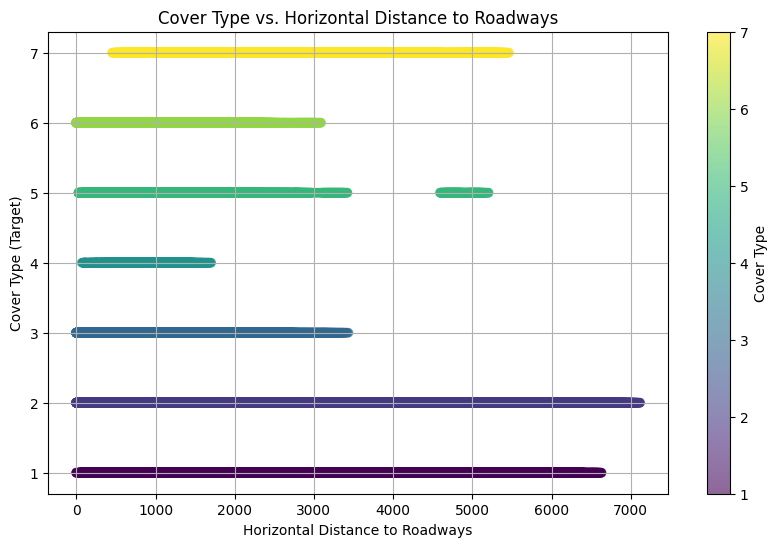

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Horizontal_Distance_To_Roadways'], df['Target'], alpha=0.6, c=df['Target'], cmap='viridis')
plt.title('Cover Type vs. Horizontal Distance to Roadways')
plt.xlabel('Horizontal Distance to Roadways')
plt.ylabel('Cover Type (Target)')
plt.colorbar(label='Cover Type')
plt.grid(True)
plt.show()